<a href="https://colab.research.google.com/github/sarmi2325/Neural_Network/blob/main/04_ChainRule_%26_MultiVariableChainRule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Chain Rule**: Used to compute gradients in nested functions (layer by layer).
- **Multivariable Chain Rule**: Used when a function depends on multiple variables (weights).
- Both are essential for **backpropagation** — the process that trains neural networks by calculating gradients.
-  These rules allow neural networks to learn by flowing the loss information backward through layers to update weights.


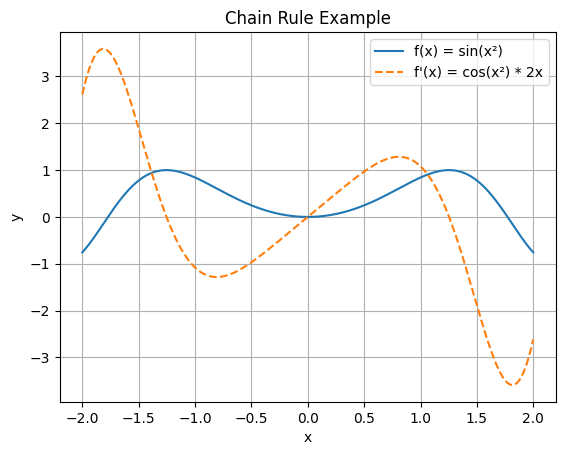

In [1]:
# Chain Rule:
# f(x) = sin(x^2)
# Let g(x) = x^2, h(u) = sin(u), so f(x) = h(g(x))

import numpy as np
import matplotlib.pyplot as plt

# Define inner and outer functions
def g(x):
    return x**2

def h(u):
    return np.sin(u)

# Combined function f(x)
def f(x):
    return h(g(x))  # sin(x^2)

# Derivative using chain rule: f'(x) = cos(x^2) * 2x
def df(x):
    return np.cos(x**2) * 2*x

x = np.linspace(-2, 2, 400)
y = f(x)
dy = df(x)

plt.plot(x, y, label='f(x) = sin(x²)')
plt.plot(x, dy, label="f'(x) = cos(x²) * 2x", linestyle='--')
plt.title("Chain Rule Example")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


###  Chain Rule Visualization

In this graph:

- The **blue curve** shows the function:  
  \[
  f(x) = sin(x^2)
  \]
- The **orange dashed curve** is the derivative:  
  \[
  f'(x) = cos(x^2) * 2x
  \]

This represents the **chain rule**, where:
- We have a function composed of another function: \( f(x) = h(g(x)) = sin(x^2) \)
- To differentiate, we multiply the derivative of the outer function ( h'(g(x)) = cos(x^2) \) with the derivative of the inner function \( g'(x) = 2x \)

This is exactly how **gradients are passed through layers** in a neural network — one layer at a time.


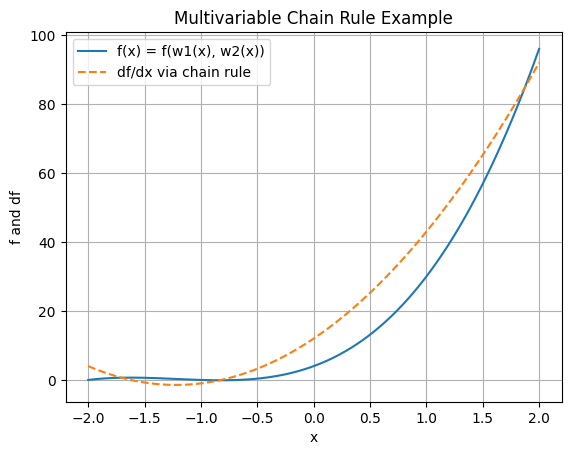

In [2]:
# f(w1, w2) = w1^2 + w1*w2
# w1 = 3x + 2
# w2 = x^2
# So f is a function of x indirectly

def w1(x):
    return 3*x + 2

def w2(x):
    return x**2

def f(w1, w2):
    return w1**2 + w1*w2

# Compute f(x)
def f_composite(x):
    return f(w1(x), w2(x))

# Now apply multivariable chain rule:
# df/dx = ∂f/∂w1 * dw1/dx + ∂f/∂w2 * dw2/dx

def df_dx(x):
    # Partial derivatives:
    w1_val = w1(x)
    w2_val = w2(x)

    df_dw1 = 2*w1_val + w2_val   # ∂f/∂w1
    df_dw2 = w1_val              # ∂f/∂w2

    dw1_dx = 3                   # derivative of 3x+2
    dw2_dx = 2*x                 # derivative of x^2

    return df_dw1 * dw1_dx + df_dw2 * dw2_dx

# Plot
x_vals = np.linspace(-2, 2, 400)
f_vals = f_composite(x_vals)
df_vals = df_dx(x_vals)

plt.plot(x_vals, f_vals, label="f(x) = f(w1(x), w2(x))")
plt.plot(x_vals, df_vals, label="df/dx via chain rule", linestyle='--')
plt.title("Multivariable Chain Rule Example")
plt.xlabel("x")
plt.ylabel("f and df")
plt.legend()
plt.grid(True)
plt.show()


### Multivariable Chain Rule Visualization

In this graph:

- The **blue curve** represents the output of the composed function:  
  \[
  f(w_1(x), w_2(x)) = w_1^2 + w_1 * w_2
  \]
  where \( w_1 = 3x + 2 \), \( w_2 = x^2 \)

- The **orange dashed curve** shows how the output changes with respect to \( x \), i.e.,  
  \[
  {df}/{dx}
  \]

This demonstrates the **multivariable chain rule**, where:
- The function depends on **two variables** \( w_1 \) and \( w_2 \), which themselves depend on \( x \)


This reflects how **loss functions in machine learning** depend on many weights, and how each weight's effect must be summed when computing gradients.
